In [129]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
#importing datasets
hist_bill = pd.read_csv('historical_bill_data.csv')#,index_col = 'CONTRACT_ACCOUNT')
house_features = pd.read_csv('house_features.csv')#,index_col = 'CA Number')

In [131]:
hist_bill.head()

,CONTRACT_ACCOUNT,201701,201702,201703,201704,201705,201706,201707,201708,201709,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
0,0,640.0,811.0,346.0,541.0,1228.0,1265.0,1079.0,1107.0,2043.0,...,1009.0,1147.0,1708.0,0.0,1227.0,736.0,541.0,444.0,845.0,21498
1,1,256.0,272.0,205.0,322.0,443.0,820.0,762.0,473.0,901.0,...,377.0,686.0,1268.0,613.0,428.0,242.0,195.0,159.0,251.0,10480
2,2,510.0,727.0,538.0,931.0,1506.0,1463.0,1685.0,1386.0,2580.0,...,1033.0,1312.0,2000.0,835.0,1022.0,767.0,371.0,287.0,439.0,23074
3,3,307.0,339.0,373.0,624.0,1297.0,1075.0,33.0,89.0,752.0,...,458.0,922.0,1321.0,547.0,498.0,344.0,221.0,228.0,441.0,11860
4,4,403.0,393.0,267.0,317.0,721.0,683.0,510.0,75.0,897.0,...,578.0,1027.0,1253.0,539.0,517.0,273.0,230.0,275.0,437.0,12363


In [132]:
house_features.head()

,CA Number,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,Q-17_No of Geysers,Q-18_No of Fans,Q-18_No of Washing Machine,Total Residents
0,55,338,Una,0,Southfacing,2,2,0,1.0,1,1.0,5,1.0,2
1,119,342,Anandlok,1,None,3,4,0,4.0,1,1.0,10,1.0,4
2,144,347,Una,2,None,2,2,1,1.0,1,1.0,6,1.0,3
3,151,353,Anandlok,2,None,3,3,0,4.0,2,2.0,6,2.0,3
4,53,357,Una,3,Southfacing,3,4,0,2.0,1,1.0,4,1.0,4


In [133]:
#renaming column 'CA Number' of house_features to 'CONTRACT_ACCOUNT' so that it matches with column of hist_bill dataset
house_features.rename(columns={'CA Number':'CONTRACT_ACCOUNT'},inplace = True)

In [134]:
hist_bill.shape

(181, 27)

In [135]:
house_features.shape

(162, 14)

In [136]:
house_features.head()

,CONTRACT_ACCOUNT,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,Q-17_No of Geysers,Q-18_No of Fans,Q-18_No of Washing Machine,Total Residents
0,55,338,Una,0,Southfacing,2,2,0,1.0,1,1.0,5,1.0,2
1,119,342,Anandlok,1,None,3,4,0,4.0,1,1.0,10,1.0,4
2,144,347,Una,2,None,2,2,1,1.0,1,1.0,6,1.0,3
3,151,353,Anandlok,2,None,3,3,0,4.0,2,2.0,6,2.0,3
4,53,357,Una,3,Southfacing,3,4,0,2.0,1,1.0,4,1.0,4


In [137]:
house_features.describe()

,CONTRACT_ACCOUNT,Survey Duration,Q_5_Floor No,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,Q-17_No of Geysers,Q-18_No of Fans,Q-18_No of Washing Machine,Total Residents
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,156.000000,162.000000,159.000000,162.000000,153.000000,162.000000
mean,89.376543,672.055556,2.234568,2.685185,2.907407,0.370370,2.435897,1.067901,1.314465,4.938272,1.006536,3.277778
std,51.642827,296.716906,1.860152,0.615254,1.135566,0.703928,0.984915,0.252356,0.541194,1.259455,0.080845,1.370723
min,0.000000,338.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45.250000,469.250000,1.000000,2.000000,2.000000,0.000000,2.000000,1.000000,1.000000,4.000000,1.000000,2.000000
50%,90.500000,592.500000,2.000000,3.000000,3.000000,0.000000,2.000000,1.000000,1.000000,5.000000,1.000000,3.000000
75%,132.750000,754.750000,3.000000,3.000000,4.000000,1.000000,3.000000,1.000000,2.000000,5.750000,1.000000,4.000000
max,178.000000,2307.000000,7.000000,4.000000,6.000000,4.000000,5.000000,2.000000,3.000000,10.000000,2.000000,8.000000


## Cleaning datasets

In [138]:
house_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 14 columns):
CONTRACT_ACCOUNT                                                   162 non-null int64
Survey Duration                                                    162 non-null int64
Q-1_Name of the Apartment                                          162 non-null object
Q_5_Floor No                                                       162 non-null int64
Q-6_Does your bedroom has any of the following characteristics?    162 non-null object
Q-9_Apartment Type_bhk                                             162 non-null int64
Q-10_adults                                                        162 non-null int64
Q-10_Children                                                      162 non-null int64
Q-15-No of Acs                                                     156 non-null float64
Q-16_No of Refrigerators                                           162 non-null int64
Q-17_No of Geysers             

In [139]:
#checking for null values in the house_features dataset
house_features.isnull().any()

CONTRACT_ACCOUNT                                                   False
Survey Duration                                                    False
Q-1_Name of the Apartment                                          False
Q_5_Floor No                                                       False
Q-6_Does your bedroom has any of the following characteristics?    False
Q-9_Apartment Type_bhk                                             False
Q-10_adults                                                        False
Q-10_Children                                                      False
Q-15-No of Acs                                                      True
Q-16_No of Refrigerators                                           False
Q-17_No of Geysers                                                  True
Q-18_No of Fans                                                    False
Q-18_No of Washing Machine                                          True
Total Residents                                    

In [140]:
house_features['Q-15-No of Acs'].value_counts()                #there are 156 ACs

2.0    59
3.0    43
1.0    28
4.0    25
5.0     1
Name: Q-15-No of Acs, dtype: int64

In [141]:
house_features['Q-17_No of Geysers'].value_counts()#.sum()       #there are 159 geysers

1.0    115
2.0     38
3.0      6
Name: Q-17_No of Geysers, dtype: int64

In [142]:
house_features['Q-18_No of Washing Machine'].value_counts()       #there are 153 washing machines

1.0    152
2.0      1
Name: Q-18_No of Washing Machine, dtype: int64

In [143]:
house_features['Q-15-No of Acs'].values

array([ 1.,  4.,  1.,  4.,  2.,  2.,  3.,  2.,  4.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  3.,  1.,  3.,  2.,  1.,  2.,  2.,  2.,
        2.,  4.,  1.,  1.,  3., nan,  3.,  3.,  4.,  1.,  2.,  2.,  1.,
        3.,  1.,  2.,  2.,  2.,  3.,  2.,  1.,  4.,  3.,  1.,  3.,  1.,
        3.,  3.,  1.,  2.,  3.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,
        5.,  1.,  2.,  1.,  2.,  3.,  2.,  4.,  1.,  3.,  3.,  2.,  3.,
        4.,  4.,  4.,  4.,  3.,  2.,  3., nan,  3.,  2.,  3.,  2.,  2.,
        2.,  1.,  3.,  2.,  2.,  1.,  3.,  2.,  3.,  4., nan,  1.,  2.,
        3.,  2.,  4.,  3.,  2.,  3.,  3.,  3.,  1.,  2.,  4.,  2.,  1.,
        1.,  2., nan,  2., nan,  2.,  3.,  2.,  3.,  1.,  4.,  3.,  1.,
        1.,  4.,  3.,  4.,  4.,  1.,  2.,  2.,  3.,  4.,  3.,  4.,  1.,
        2.,  3.,  2.,  4.,  4.,  4.,  3.,  1.,  2.,  3.,  3.,  2.,  3.,
        2.,  4.,  3.,  3.,  4., nan])

In [144]:
house_features['Q-17_No of Geysers'].values

array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  2., nan,  1.,  1.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,
        3.,  2.,  1.,  1.,  2.,  1., nan,  2.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  1., nan,  1.,  2.,
        1.,  1.,  3.,  2.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,
        2.,  1.,  2.,  2.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  3.,  1.,  1.,  2.,
        1.,  2.,  3.,  2.,  1.,  1.])

In [145]:
house_features['Q-18_No of Washing Machine'].values

array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,
        1.,  1.,  1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,
       nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,  1.,
        1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

In [146]:
#replacing null values by mean
house_features['Q-15-No of Acs'].fillna(round(house_features['Q-15-No of Acs'].mean()),inplace = True)

In [147]:
house_features['Q-17_No of Geysers'].fillna(round(house_features['Q-17_No of Geysers'].mean()),inplace = True)

In [148]:
house_features['Q-18_No of Washing Machine'].fillna(round(house_features['Q-18_No of Washing Machine'].mean()),inplace = True)

In [149]:
house_features.isnull().any()

CONTRACT_ACCOUNT                                                   False
Survey Duration                                                    False
Q-1_Name of the Apartment                                          False
Q_5_Floor No                                                       False
Q-6_Does your bedroom has any of the following characteristics?    False
Q-9_Apartment Type_bhk                                             False
Q-10_adults                                                        False
Q-10_Children                                                      False
Q-15-No of Acs                                                     False
Q-16_No of Refrigerators                                           False
Q-17_No of Geysers                                                 False
Q-18_No of Fans                                                    False
Q-18_No of Washing Machine                                         False
Total Residents                                    

In [150]:
#checking null values in historical bill dataset
hist_bill.isnull().any()

CONTRACT_ACCOUNT    False
201701               True
201702               True
201703               True
201704               True
201705               True
201706               True
201707               True
201708               True
201709               True
201710               True
201711               True
201712               True
201801               True
201802               True
201803               True
201804               True
201805               True
201806               True
201807               True
201808               True
201809               True
201810               True
201811               True
201812               True
201901               True
Grand Total         False
dtype: bool

In [151]:
#replacing null values by mean 
for i in hist_bill.columns:
    hist_bill[i].fillna(round(hist_bill[i].mean()),inplace=True)

In [152]:
hist_bill.isnull().any()

CONTRACT_ACCOUNT    False
201701              False
201702              False
201703              False
201704              False
201705              False
201706              False
201707              False
201708              False
201709              False
201710              False
201711              False
201712              False
201801              False
201802              False
201803              False
201804              False
201805              False
201806              False
201807              False
201808              False
201809              False
201810              False
201811              False
201812              False
201901              False
Grand Total         False
dtype: bool

## Merging two datasets by using common columns

In [153]:
dataset = pd.merge(house_features,hist_bill, on = 'CONTRACT_ACCOUNT')
dataset

,CONTRACT_ACCOUNT,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
0,55,338,Una,0,Southfacing,2,2,0,1.0,1,...,59.0,81.0,8.0,0.0,105.0,126.0,83.0,0.0,0.0,2923
1,119,342,Anandlok,1,None,3,4,0,4.0,1,...,374.0,769.0,1191.0,427.0,388.0,206.0,135.0,148.0,64.0,10486
2,144,347,Una,2,None,2,2,1,1.0,1,...,0.0,0.0,0.0,0.0,0.0,19.0,16.0,1.0,55.0,1781
3,151,353,Anandlok,2,None,3,3,0,4.0,2,...,1278.0,1748.0,3100.0,1234.0,1179.0,958.0,556.0,460.0,652.0,24870
4,53,357,Una,3,Southfacing,3,4,0,2.0,1,...,612.0,1223.0,2075.0,793.0,749.0,493.0,263.0,308.0,247.0,14582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,148,1468,Anandlok,3,None,2,2,0,4.0,1,...,336.0,754.0,1028.0,417.0,458.0,340.0,206.0,226.0,237.0,6533
158,111,1503,Anandlok,2,Southfacing,3,5,0,3.0,1,...,863.0,1447.0,2366.0,1006.0,1160.0,761.0,409.0,327.0,308.0,19239
159,176,1595,Anandlok,1,Southfacing,3,3,0,3.0,1,...,884.0,1516.0,2543.0,1061.0,1145.0,19.0,41.0,51.0,149.0,260
160,127,1605,Anandlok,2,None,3,5,1,4.0,1,...,882.0,1468.0,2354.0,1054.0,1059.0,689.0,310.0,297.0,299.0,19388


In [154]:
dataset.isnull().any()

CONTRACT_ACCOUNT                                                   False
Survey Duration                                                    False
Q-1_Name of the Apartment                                          False
Q_5_Floor No                                                       False
Q-6_Does your bedroom has any of the following characteristics?    False
Q-9_Apartment Type_bhk                                             False
Q-10_adults                                                        False
Q-10_Children                                                      False
Q-15-No of Acs                                                     False
Q-16_No of Refrigerators                                           False
Q-17_No of Geysers                                                 False
Q-18_No of Fans                                                    False
Q-18_No of Washing Machine                                         False
Total Residents                                    

In [155]:
#sorting the dataset
dataset.sort_values('CONTRACT_ACCOUNT',inplace = True)

In [156]:
dataset

,CONTRACT_ACCOUNT,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
77,0,584,Anandlok,0,Southfacing,3,3,0,3.0,2,...,1009.0,1147.0,1708.0,0.0,1227.0,736.0,541.0,444.0,845.0,21498
47,1,495,Anandlok,0,Southfacing,3,2,0,4.0,1,...,377.0,686.0,1268.0,613.0,428.0,242.0,195.0,159.0,251.0,10480
87,2,610,Anandlok,2,None,3,3,0,2.0,1,...,1033.0,1312.0,2000.0,835.0,1022.0,767.0,371.0,287.0,439.0,23074
150,3,1175,Anandlok,6,None,3,2,0,1.0,1,...,458.0,922.0,1321.0,547.0,498.0,344.0,221.0,228.0,441.0,11860
89,4,613,Anandlok,5,Southfacing,3,3,0,2.0,1,...,578.0,1027.0,1253.0,539.0,517.0,273.0,230.0,275.0,437.0,12363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,174,595,Anandlok,0,Southfacing,3,1,0,2.0,1,...,169.0,375.0,783.0,223.0,236.0,394.0,176.0,147.0,29.0,2532
109,175,718,Anandlok,4,Southfacing,3,3,0,3.0,1,...,884.0,987.0,1501.0,676.0,846.0,604.0,351.0,287.0,211.0,5463
159,176,1595,Anandlok,1,Southfacing,3,3,0,3.0,1,...,884.0,1516.0,2543.0,1061.0,1145.0,19.0,41.0,51.0,149.0,260
95,177,624,Una,0,Southfacing,2,3,0,2.0,1,...,884.0,1516.0,2543.0,1061.0,1145.0,377.0,190.0,170.0,220.0,957


## Analysing the dataset

In [157]:
dataset.columns

Index(['CONTRACT_ACCOUNT', 'Survey Duration', 'Q-1_Name of the Apartment',
       'Q_5_Floor No',
       'Q-6_Does your bedroom has any of the following characteristics?',
       'Q-9_Apartment Type_bhk', 'Q-10_adults', 'Q-10_Children',
       'Q-15-No of Acs', 'Q-16_No of Refrigerators', 'Q-17_No of Geysers',
       'Q-18_No of Fans', 'Q-18_No of Washing Machine', 'Total Residents',
       '201701', '201702', '201703', '201704', '201705', '201706', '201707',
       '201708', '201709', '201710', '201711', '201712', '201801', '201802',
       '201803', '201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812', '201901', 'Grand Total'],
      dtype='object')

In [158]:
dataset['Q-1_Name of the Apartment'].value_counts()

Anandlok    90
Una         72
Name: Q-1_Name of the Apartment, dtype: int64

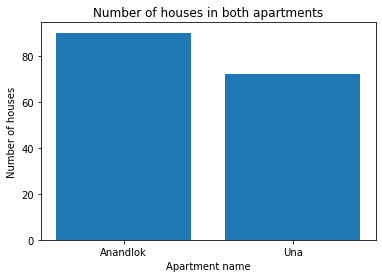

In [159]:
plt.bar(dataset['Q-1_Name of the Apartment'].unique(),dataset['Q-1_Name of the Apartment'].value_counts())
plt.title('Number of houses in both apartments')
plt.xlabel('Apartment name')
plt.ylabel('Number of houses')
plt.show()

In [160]:
apartment = dataset.groupby('Q-1_Name of the Apartment')

In [161]:
apartment

In [162]:
apartment.sum()#['Q-15-No of Acs']#.plot()

,CONTRACT_ACCOUNT,Survey Duration,Q_5_Floor No,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,Q-17_No of Geysers,Q-18_No of Fans,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
Q-1_Name of the Apartment,,,,,,,,,,,,,,,,,,,,,
Anandlok,8660,67196,270,272,248,19,244.0,98,130.0,471,...,46017.0,76114.0,115090.0,47061.0,51353.0,34646.0,20965.0,21415.0,31829.0,1019069
Una,5819,41677,92,163,223,41,148.0,75,82.0,329,...,30600.0,53386.0,101964.0,43119.0,45584.0,28808.0,17792.0,14147.0,17074.0,801277


#### Plotting number of appliances in Anandlok and Una apartments

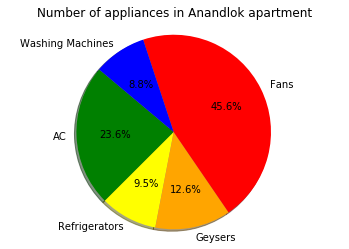

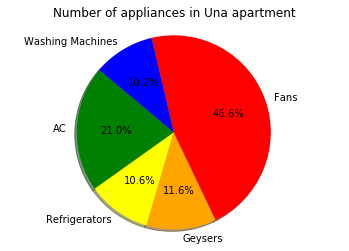

In [163]:
plt.figure(0)
labels = 'AC','Refrigerators','Geysers','Fans','Washing Machines'
sizes = [apartment.sum()['Q-15-No of Acs'][0],apartment.sum()['Q-16_No of Refrigerators'][0],apartment.sum()['Q-17_No of Geysers'][0],apartment.sum()['Q-18_No of Fans'][0],apartment.sum()['Q-18_No of Washing Machine'][0]]
colors = ['Green','Yellow','Orange','Red','Blue']
explode = (0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Number of appliances in Anandlok apartment')
plt.axis('equal')

plt.figure(1)
labels = 'AC','Refrigerators','Geysers','Fans','Washing Machines'
sizes = [apartment.sum()['Q-15-No of Acs'][1],apartment.sum()['Q-16_No of Refrigerators'][1],apartment.sum()['Q-17_No of Geysers'][1],apartment.sum()['Q-18_No of Fans'][1],apartment.sum()['Q-18_No of Washing Machine'][1]]
colors = ['Green','Yellow','Orange','Red','Blue']
explode = (0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Number of appliances in Una apartment')
plt.axis('equal')
plt.show()

#### Comparing number of appliances in Anandlok and Una apartments

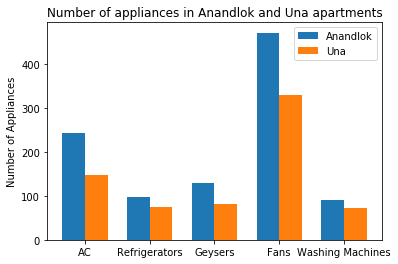

In [164]:
labels=['AC','Refrigerators','Geysers','Fans','Washing Machines']
anandlok = [apartment.sum()['Q-15-No of Acs'][0],apartment.sum()['Q-16_No of Refrigerators'][0],apartment.sum()['Q-17_No of Geysers'][0],apartment.sum()['Q-18_No of Fans'][0],apartment.sum()['Q-18_No of Washing Machine'][0]]
una = [apartment.sum()['Q-15-No of Acs'][1],apartment.sum()['Q-16_No of Refrigerators'][1],apartment.sum()['Q-17_No of Geysers'][1],apartment.sum()['Q-18_No of Fans'][1],apartment.sum()['Q-18_No of Washing Machine'][1]]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, anandlok, width, label='Anandlok')
rects2 = ax.bar(x + width/2, una, width, label='Una')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Appliances')
ax.set_title('Number of appliances in Anandlok and Una apartments')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [165]:
dataset.head()

,CONTRACT_ACCOUNT,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
77,0,584,Anandlok,0,Southfacing,3,3,0,3.0,2,...,1009.0,1147.0,1708.0,0.0,1227.0,736.0,541.0,444.0,845.0,21498
47,1,495,Anandlok,0,Southfacing,3,2,0,4.0,1,...,377.0,686.0,1268.0,613.0,428.0,242.0,195.0,159.0,251.0,10480
87,2,610,Anandlok,2,None,3,3,0,2.0,1,...,1033.0,1312.0,2000.0,835.0,1022.0,767.0,371.0,287.0,439.0,23074
150,3,1175,Anandlok,6,None,3,2,0,1.0,1,...,458.0,922.0,1321.0,547.0,498.0,344.0,221.0,228.0,441.0,11860
89,4,613,Anandlok,5,Southfacing,3,3,0,2.0,1,...,578.0,1027.0,1253.0,539.0,517.0,273.0,230.0,275.0,437.0,12363


## Electricity consumed by Anandlok vs Una apartment in different months and different years

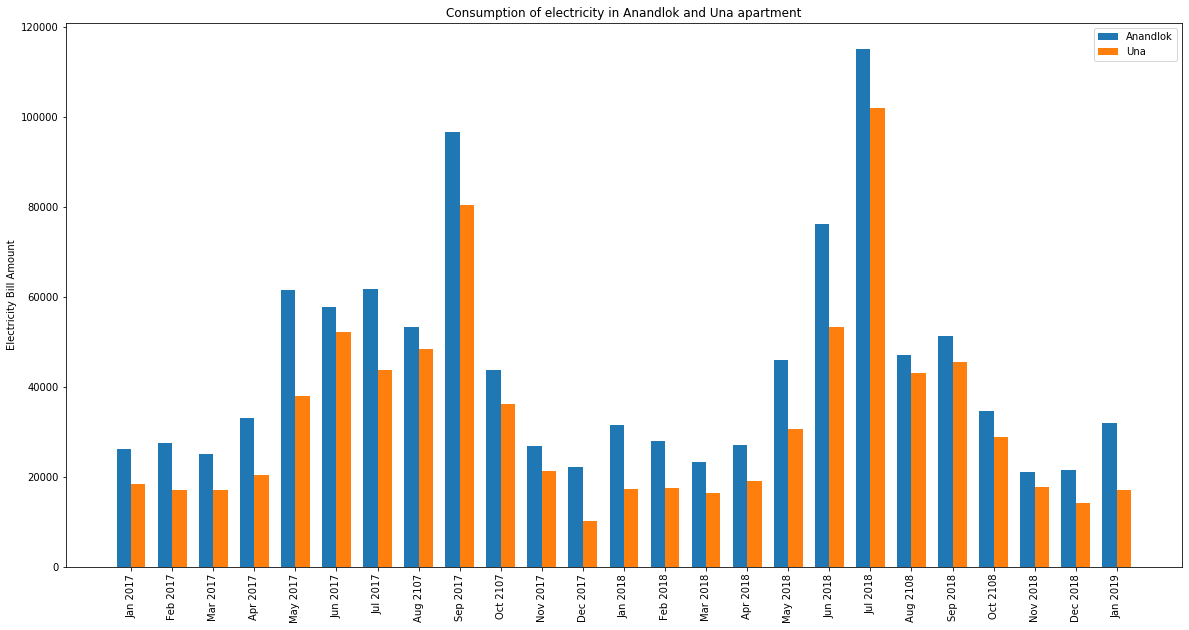

In [166]:
labels=['Jan 2017','Feb 2017','Mar 2017','Apr 2017','May 2017','Jun 2017','Jul 2017','Aug 2107','Sep 2017','Oct 2107','Nov 2017','Dec 2017','Jan 2018','Feb 2018','Mar 2018','Apr 2018','May 2018','Jun 2018','Jul 2018','Aug 2108','Sep 2018','Oct 2108','Nov 2018','Dec 2018','Jan 2019']
anandlok = [apartment.sum()['201701'][0],apartment.sum()['201702'][0],apartment.sum()['201703'][0],apartment.sum()['201704'][0],apartment.sum()['201705'][0],apartment.sum()['201706'][0],apartment.sum()['201707'][0],apartment.sum()['201708'][0],apartment.sum()['201709'][0],apartment.sum()['201710'][0],apartment.sum()['201711'][0],apartment.sum()['201712'][0],apartment.sum()['201801'][0],apartment.sum()['201802'][0],apartment.sum()['201803'][0],apartment.sum()['201804'][0],apartment.sum()['201805'][0],apartment.sum()['201806'][0],apartment.sum()['201807'][0],apartment.sum()['201808'][0],apartment.sum()['201809'][0],apartment.sum()['201810'][0],apartment.sum()['201811'][0],apartment.sum()['201812'][0],apartment.sum()['201901'][0]]
una = [apartment.sum()['201701'][1],apartment.sum()['201702'][1],apartment.sum()['201703'][1],apartment.sum()['201704'][1],apartment.sum()['201705'][1],apartment.sum()['201706'][1],apartment.sum()['201707'][1],apartment.sum()['201708'][1],apartment.sum()['201709'][1],apartment.sum()['201710'][1],apartment.sum()['201711'][1],apartment.sum()['201712'][1],apartment.sum()['201801'][1],apartment.sum()['201802'][1],apartment.sum()['201803'][1],apartment.sum()['201804'][1],apartment.sum()['201805'][1],apartment.sum()['201806'][1],apartment.sum()['201807'][1],apartment.sum()['201808'][1],apartment.sum()['201809'][1],apartment.sum()['201810'][1],apartment.sum()['201811'][1],apartment.sum()['201812'][1],apartment.sum()['201901'][1]]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig,ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, anandlok, width, label='Anandlok')
rects2 = ax.bar(x + width/2, una, width, label='Una')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Electricity Bill Amount')
ax.set_title('Consumption of electricity in Anandlok and Una apartment')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 'vertical')
ax.legend()
plt.show()

## Number of appliances in south facing and non south facing apartments

In [167]:
face = dataset.groupby('Q-6_Does your bedroom has any of the following characteristics?').sum()
face

,CONTRACT_ACCOUNT,Survey Duration,Q_5_Floor No,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,Q-17_No of Geysers,Q-18_No of Fans,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
Q-6_Does your bedroom has any of the following characteristics?,,,,,,,,,,,,,,,,,,,,,
None,5362,38242,105,147,185,29,132.0,67,77.0,270,...,26948.0,45143.0,80889.0,34930.0,35948.0,24415.0,14849.0,12696.0,16063.0,681769
Southfacing,9117,70631,257,288,286,31,260.0,106,135.0,530,...,49669.0,84357.0,136165.0,55250.0,60989.0,39039.0,23908.0,22866.0,32840.0,1138577


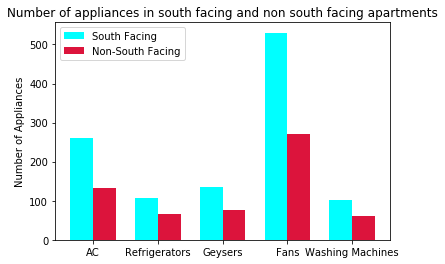

In [168]:
labels = ['AC','Refrigerators','Geysers','Fans','Washing Machines']
non_sfAppliance = [face['Q-15-No of Acs'][0],face['Q-16_No of Refrigerators'][0],face['Q-17_No of Geysers'][0],face['Q-18_No of Fans'][0],face['Q-18_No of Washing Machine'][0]]
sfAppliance = [face['Q-15-No of Acs'][1],face['Q-16_No of Refrigerators'][1],face['Q-17_No of Geysers'][1],face['Q-18_No of Fans'][1],face['Q-18_No of Washing Machine'][1]]
x = np.arange(len(labels))
width = 0.35
fig,ax = plt.subplots()
graph1 = ax.bar(x-width/2, sfAppliance, width, label='South Facing', color = ['cyan'])
grapg2 = ax.bar(x+width/2, non_sfAppliance, width, label='Non-South Facing', color = ['crimson'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Appliances')
ax.set_title('Number of appliances in south facing and non south facing apartments')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

## Electricity consumed by south facing vs non-south facing apartments

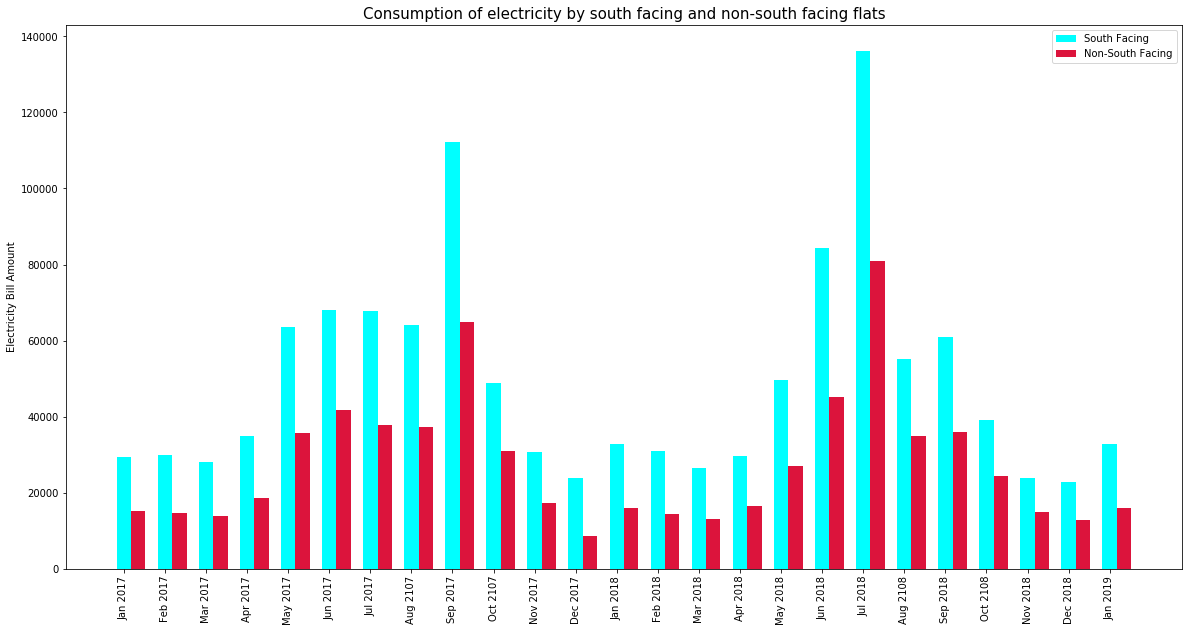

In [169]:
labels = ['Jan 2017','Feb 2017','Mar 2017','Apr 2017','May 2017','Jun 2017','Jul 2017','Aug 2107','Sep 2017','Oct 2107','Nov 2017','Dec 2017','Jan 2018','Feb 2018','Mar 2018','Apr 2018','May 2018','Jun 2018','Jul 2018','Aug 2108','Sep 2018','Oct 2108','Nov 2018','Dec 2018','Jan 2019']
non_southFacing = [face['201701'][0],face['201702'][0],face['201703'][0],face['201704'][0],face['201705'][0],face['201706'][0],face['201707'][0],face['201708'][0],face['201709'][0],face['201710'][0],face['201711'][0],face['201712'][0],face['201801'][0],face['201802'][0],face['201803'][0],face['201804'][0],face['201805'][0],face['201806'][0],face['201807'][0],face['201808'][0],face['201809'][0],face['201810'][0],face['201811'][0],face['201812'][0],face['201901'][0]]
southFacing = [face['201701'][1],face['201702'][1],face['201703'][1],face['201704'][1],face['201705'][1],face['201706'][1],face['201707'][1],face['201708'][1],face['201709'][1],face['201710'][1],face['201711'][1],face['201712'][1],face['201801'][1],face['201802'][1],face['201803'][1],face['201804'][1],face['201805'][1],face['201806'][1],face['201807'][1],face['201808'][1],face['201809'][1],face['201810'][1],face['201811'][1],face['201812'][1],face['201901'][1]]
x = np.arange(len(labels))
width = 0.35
fig,ax = plt.subplots(figsize = (20,10))
graph1 = ax.bar(x,southFacing,width,label='South Facing',color=['cyan'])
graph2 = ax.bar(x+width,non_southFacing,width,label='Non-South Facing',color=['crimson'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Electricity Bill Amount')
ax.set_title('Consumption of electricity by south facing and non-south facing flats',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 'vertical')
ax.legend()
plt.show()

According to above graph we can conclude that, obviously in summer more electricity is being used than winters but according to graph we can see that july month of 2018 is much more hotter than that of 2017 and september month of 2018 is colder than that of 2017 and this is the case for other months also. According to graph south facing flats comparatively consumes more electricity than non-south facing flats, this is because, as sun rises in east and sets in west so, south facing flats gets sunlight throughout the day and it makes their houses hot so, they uses more cooling appliances.

## Detailed graph of appliances with respect to types of flats

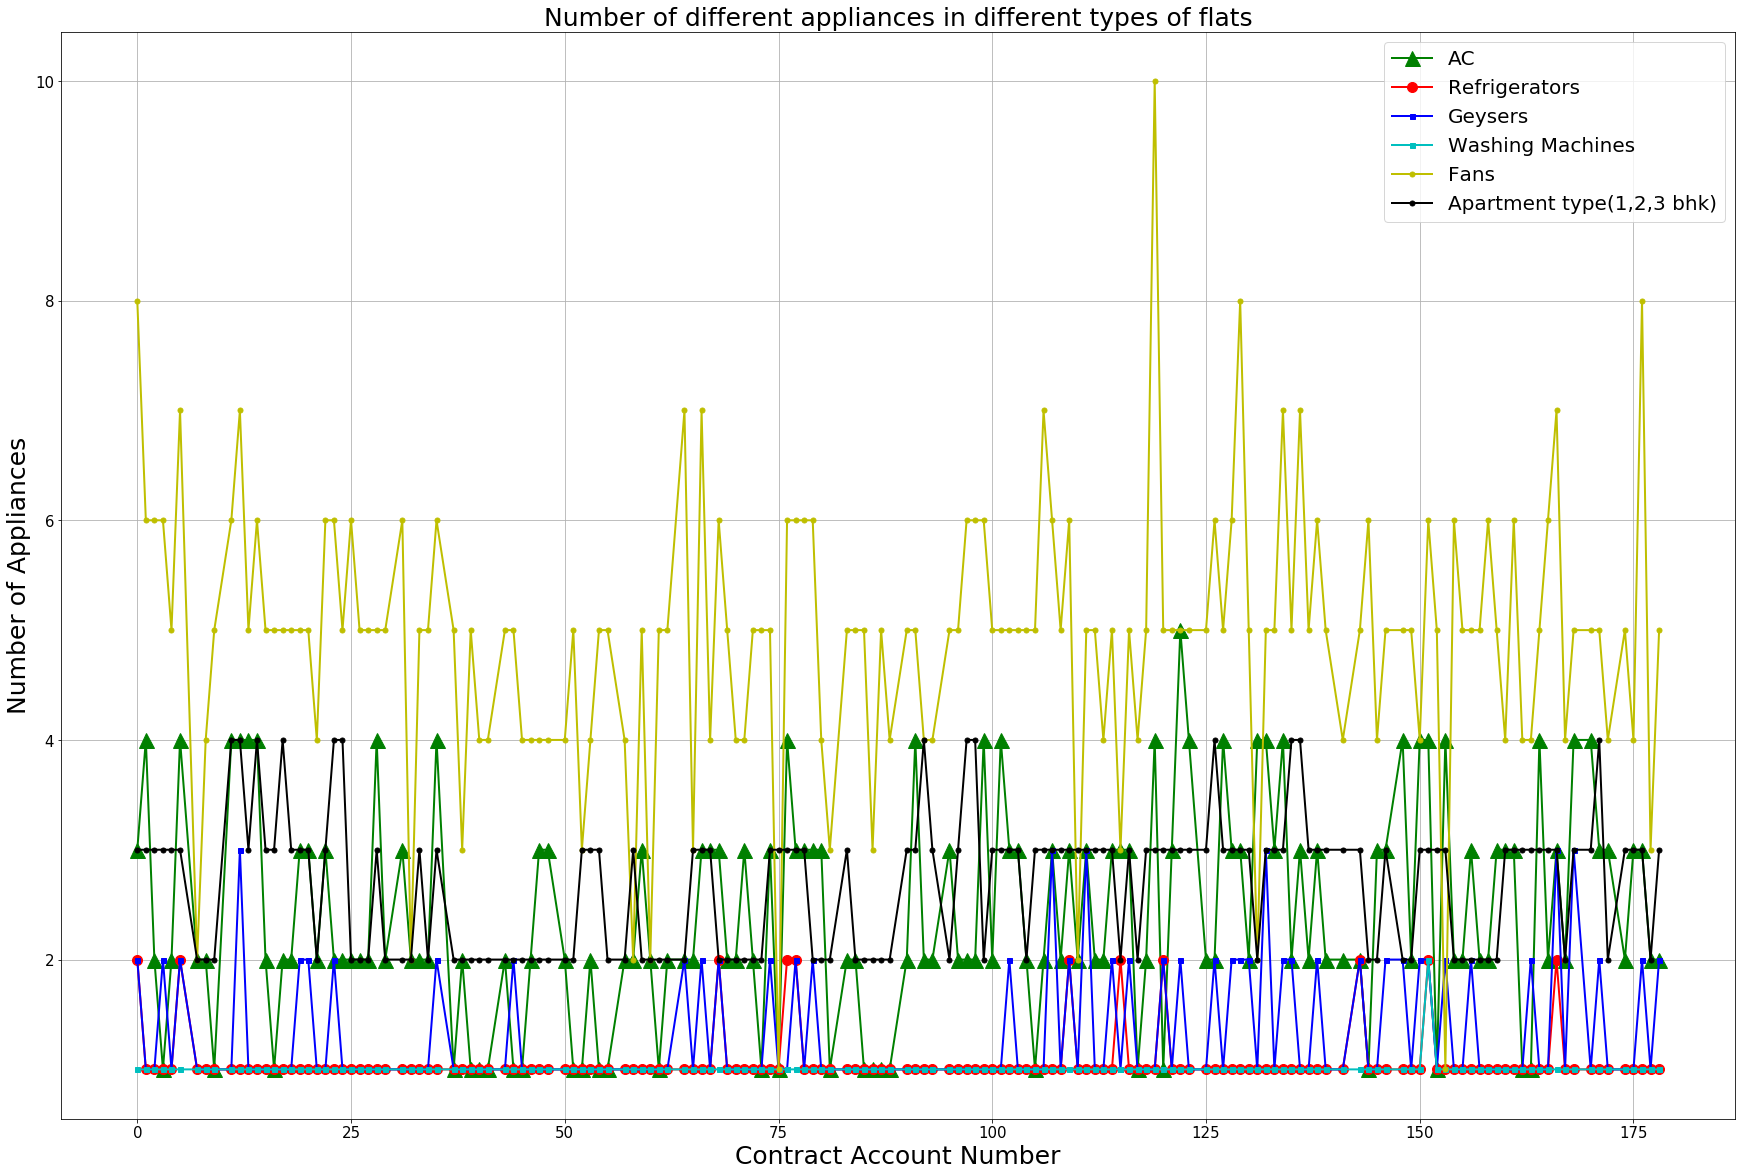

In [170]:
fig=plt.figure(figsize=(30,20))
plt.plot(dataset['CONTRACT_ACCOUNT'],dataset['Q-15-No of Acs'],"g^-",lw=2,ms=15,label='AC')
plt.plot(dataset['CONTRACT_ACCOUNT'],dataset['Q-16_No of Refrigerators'],"ro-",lw=2,ms=10,label= 'Refrigerators')
plt.plot(dataset['CONTRACT_ACCOUNT'],dataset['Q-17_No of Geysers'],"bs-",lw=2,ms=5,label = 'Geysers')
plt.plot(dataset['CONTRACT_ACCOUNT'],dataset['Q-18_No of Washing Machine'],"cs-",lw=2,ms=5,label='Washing Machines')
plt.plot(dataset['CONTRACT_ACCOUNT'],dataset['Q-18_No of Fans'],"yo-",lw=2,ms=5,label='Fans')
plt.plot(dataset['CONTRACT_ACCOUNT'],dataset['Q-9_Apartment Type_bhk'],"ko-",lw=2,ms=5,label='Apartment type(1,2,3 bhk)')
plt.xlabel('Contract Account Number',fontsize=25)
plt.ylabel('Number of Appliances',fontsize=25)
plt.title('Number of different appliances in different types of flats',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(prop={'size':20})
plt.show()

## Plotting number of appliances used by different number of adults in their flats

In [171]:
dataset.head()

,CONTRACT_ACCOUNT,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
77,0,584,Anandlok,0,Southfacing,3,3,0,3.0,2,...,1009.0,1147.0,1708.0,0.0,1227.0,736.0,541.0,444.0,845.0,21498
47,1,495,Anandlok,0,Southfacing,3,2,0,4.0,1,...,377.0,686.0,1268.0,613.0,428.0,242.0,195.0,159.0,251.0,10480
87,2,610,Anandlok,2,None,3,3,0,2.0,1,...,1033.0,1312.0,2000.0,835.0,1022.0,767.0,371.0,287.0,439.0,23074
150,3,1175,Anandlok,6,None,3,2,0,1.0,1,...,458.0,922.0,1321.0,547.0,498.0,344.0,221.0,228.0,441.0,11860
89,4,613,Anandlok,5,Southfacing,3,3,0,2.0,1,...,578.0,1027.0,1253.0,539.0,517.0,273.0,230.0,275.0,437.0,12363


In [172]:
dataset['Q-10_adults'].value_counts()

3    51
2    50
4    35
1    14
5     8
6     4
Name: Q-10_adults, dtype: int64

In [173]:
adult = dataset.groupby(['Q-10_adults'])
adult.sum()

,CONTRACT_ACCOUNT,Survey Duration,Q_5_Floor No,Q-9_Apartment Type_bhk,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,Q-17_No of Geysers,Q-18_No of Fans,Q-18_No of Washing Machine,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
Q-10_adults,,,,,,,,,,,,,,,,,,,,,
1,1157,9388,39,42,0,34.0,14,16.0,71,14.0,...,3674.0,5305.0,7936.0,2819.0,3177.0,2490.0,1651.0,1957.0,2690.0,77772
2,4135,32414,114,135,25,112.0,54,64.0,234,50.0,...,20118.0,35833.0,56529.0,23919.0,23142.0,15365.0,10183.0,9487.0,13809.0,492069
3,4631,33340,114,133,18,119.0,55,63.0,254,52.0,...,28739.0,46803.0,80057.0,33317.0,37776.0,23830.0,13748.0,11843.0,15974.0,628119
4,3744,24575,69,91,10,91.0,38,52.0,180,35.0,...,16498.0,27760.0,49375.0,20322.0,21896.0,14336.0,8869.0,8608.0,11932.0,424212
5,530,7007,19,23,4,24.0,8,12.0,38,8.0,...,4943.0,9089.0,15283.0,6427.0,7049.0,4806.0,2662.0,2316.0,2459.0,127719
6,282,2149,7,11,3,12.0,4,5.0,23,4.0,...,2645.0,4710.0,7874.0,3376.0,3897.0,2627.0,1644.0,1351.0,2039.0,70455


In [174]:
adult.sum().index

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='Q-10_adults')

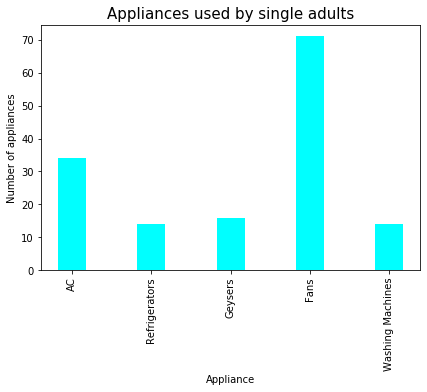

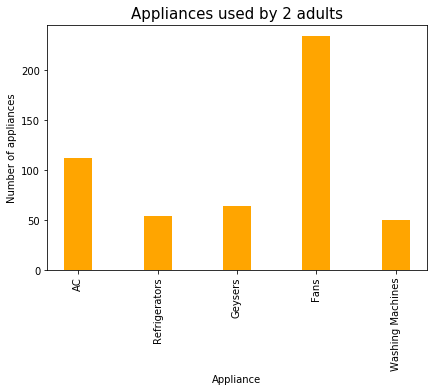

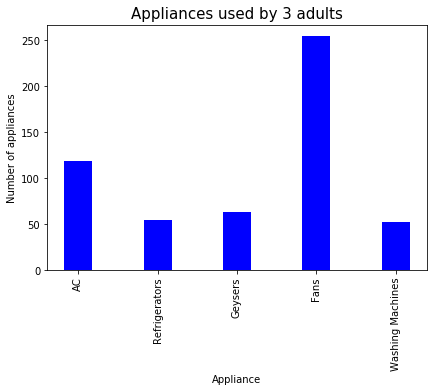

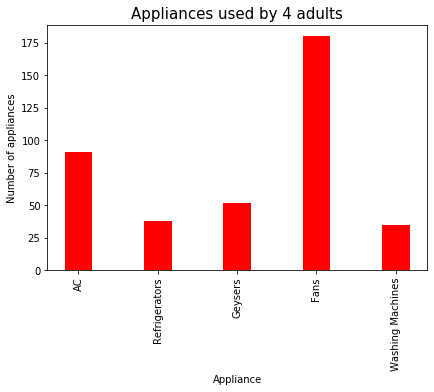

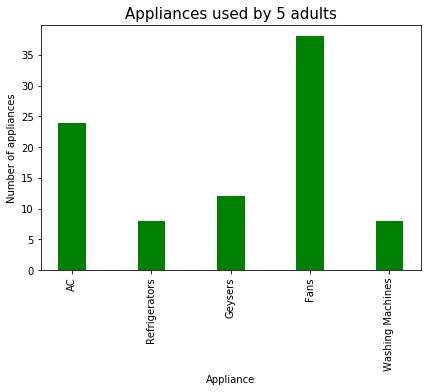

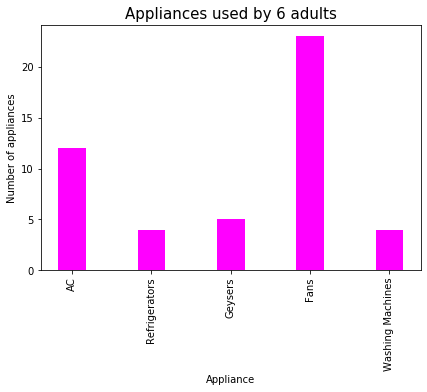

In [175]:
for i in adult.sum().index:
    labels = ['AC','Refrigerators','Geysers','Fans','Washing Machines']
    num_appliances = [adult.sum()['Q-15-No of Acs'][i],adult.sum()['Q-16_No of Refrigerators'][i],adult.sum()['Q-17_No of Geysers'][i],adult.sum()['Q-18_No of Fans'][i],adult.sum()['Q-18_No of Washing Machine'][i]]
    num_appliances
    x=np.arange(len(labels))
    width=0.35
    fig,ax=plt.subplots()
    plt.tight_layout()
    
    if i==1:
        plt.title('Appliances used by single adults', fontsize=15)
        graph = ax.bar(x,num_appliances,width,color=['cyan'])
    if i==2:
        plt.title('Appliances used by 2 adults', fontsize=15)
        graph = ax.bar(x,num_appliances,width,color=['orange'])
    if i==3:
        plt.title('Appliances used by 3 adults', fontsize=15)
        graph = ax.bar(x,num_appliances,width,color=['blue'])
    if i==4:
        plt.title('Appliances used by 4 adults', fontsize=15)
        graph = ax.bar(x,num_appliances,width,color=['red'])
    if i==5:
        plt.title('Appliances used by 5 adults', fontsize=15)
        graph = ax.bar(x,num_appliances,width,color=['green'])
    if i==6:
        plt.title('Appliances used by 6 adults', fontsize=15)
        graph = ax.bar(x,num_appliances,width,color=['magenta'])
    plt.xlabel('Appliance')
    plt.ylabel('Number of appliances')
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation = 'vertical')
    plt.show()

#### Summary of above graphs in single graph

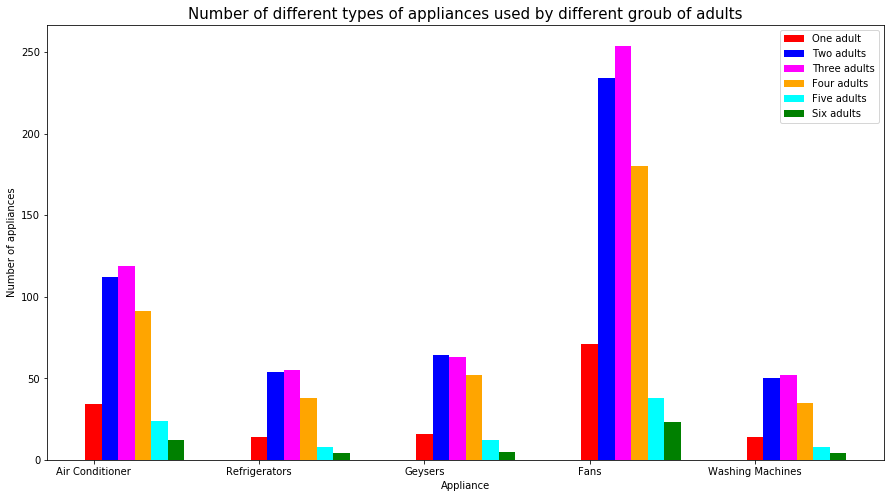

In [176]:
labels=['Air Conditioner','Refrigerators','Geysers','Fans','Washing Machines']
adult1=[adult.sum()['Q-15-No of Acs'][1],adult.sum()['Q-16_No of Refrigerators'][1],adult.sum()['Q-17_No of Geysers'][1],adult.sum()['Q-18_No of Fans'][1],adult.sum()['Q-18_No of Washing Machine'][1]]
adult2=[adult.sum()['Q-15-No of Acs'][2],adult.sum()['Q-16_No of Refrigerators'][2],adult.sum()['Q-17_No of Geysers'][2],adult.sum()['Q-18_No of Fans'][2],adult.sum()['Q-18_No of Washing Machine'][2]]
adult3=[adult.sum()['Q-15-No of Acs'][3],adult.sum()['Q-16_No of Refrigerators'][3],adult.sum()['Q-17_No of Geysers'][3],adult.sum()['Q-18_No of Fans'][3],adult.sum()['Q-18_No of Washing Machine'][3]]
adult4=[adult.sum()['Q-15-No of Acs'][4],adult.sum()['Q-16_No of Refrigerators'][4],adult.sum()['Q-17_No of Geysers'][4],adult.sum()['Q-18_No of Fans'][4],adult.sum()['Q-18_No of Washing Machine'][4]]
adult5=[adult.sum()['Q-15-No of Acs'][5],adult.sum()['Q-16_No of Refrigerators'][5],adult.sum()['Q-17_No of Geysers'][5],adult.sum()['Q-18_No of Fans'][5],adult.sum()['Q-18_No of Washing Machine'][5]]
adult6=[adult.sum()['Q-15-No of Acs'][6],adult.sum()['Q-16_No of Refrigerators'][6],adult.sum()['Q-17_No of Geysers'][6],adult.sum()['Q-18_No of Fans'][6],adult.sum()['Q-18_No of Washing Machine'][6]]
x = np.arange(len(labels))
width = 0.10
fig,ax = plt.subplots(figsize=(15,8))

bar1 = ax.bar(x,adult1,width,label = 'One adult', color=['red'])
bar2 = ax.bar(x+width,adult2,width,label = 'Two adults', color=['blue'])
bar3 = ax.bar(x+2*width,adult3,width,label = 'Three adults', color=['magenta'])
bar4 = ax.bar(x+3*width,adult4,width,label = 'Four adults', color=['orange'])
bar5 = ax.bar(x+4*width,adult5,width,label = 'Five adults', color=['cyan'])
bar6 = ax.bar(x+5*width,adult6,width,label = 'Six adults', color=['green'])
ax.set_xlabel('Appliance')
ax.set_ylabel('Number of appliances')
ax.set_title('Number of different types of appliances used by different groub of adults',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [177]:
dataset.head()

,CONTRACT_ACCOUNT,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
77,0,584,Anandlok,0,Southfacing,3,3,0,3.0,2,...,1009.0,1147.0,1708.0,0.0,1227.0,736.0,541.0,444.0,845.0,21498
47,1,495,Anandlok,0,Southfacing,3,2,0,4.0,1,...,377.0,686.0,1268.0,613.0,428.0,242.0,195.0,159.0,251.0,10480
87,2,610,Anandlok,2,None,3,3,0,2.0,1,...,1033.0,1312.0,2000.0,835.0,1022.0,767.0,371.0,287.0,439.0,23074
150,3,1175,Anandlok,6,None,3,2,0,1.0,1,...,458.0,922.0,1321.0,547.0,498.0,344.0,221.0,228.0,441.0,11860
89,4,613,Anandlok,5,Southfacing,3,3,0,2.0,1,...,578.0,1027.0,1253.0,539.0,517.0,273.0,230.0,275.0,437.0,12363


## Clustering

In [178]:
from sklearn.cluster import KMeans

### Relation between survey duration and Grand total of 25 months

In [179]:
X = dataset.iloc[:,[1,39]].values

 Finding optimal number of clusters using 'Within Cluster Sum of Squares' (wcss) method

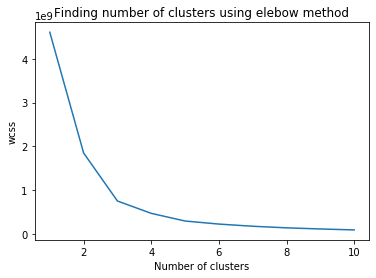

In [180]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Finding number of clusters using elebow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Number of optimal clusters are 5, because upto 5 clusters there is large change in slope and after that there is minimal change in slope.

In [181]:
kmeans= KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred = kmeans.fit_predict(X)

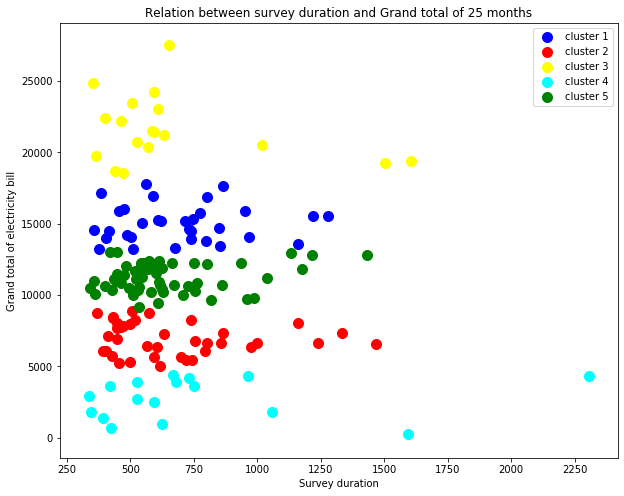

In [182]:
plt.figure(figsize=(10,8))
plt.scatter(X[pred==0,0],X[pred==0,1],c='blue',s=100,label='cluster 1')
plt.scatter(X[pred==1,0],X[pred==1,1],c='red',s=100,label='cluster 2')
plt.scatter(X[pred==2,0],X[pred==2,1],c='yellow',s=100,label='cluster 3')
plt.scatter(X[pred==3,0],X[pred==3,1],c='cyan',s=100,label='cluster 4')
plt.scatter(X[pred==4,0],X[pred==4,1],c='green',s=100,label='cluster 5')
plt.title('Relation between survey duration and Grand total of 25 months')
plt.xlabel('Survey duration')
plt.ylabel('Grand total of electricity bill')
plt.legend()
plt.show()

In [183]:
dataset.head()

,CONTRACT_ACCOUNT,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
77,0,584,Anandlok,0,Southfacing,3,3,0,3.0,2,...,1009.0,1147.0,1708.0,0.0,1227.0,736.0,541.0,444.0,845.0,21498
47,1,495,Anandlok,0,Southfacing,3,2,0,4.0,1,...,377.0,686.0,1268.0,613.0,428.0,242.0,195.0,159.0,251.0,10480
87,2,610,Anandlok,2,None,3,3,0,2.0,1,...,1033.0,1312.0,2000.0,835.0,1022.0,767.0,371.0,287.0,439.0,23074
150,3,1175,Anandlok,6,None,3,2,0,1.0,1,...,458.0,922.0,1321.0,547.0,498.0,344.0,221.0,228.0,441.0,11860
89,4,613,Anandlok,5,Southfacing,3,3,0,2.0,1,...,578.0,1027.0,1253.0,539.0,517.0,273.0,230.0,275.0,437.0,12363


In [184]:
dataset.columns

Index(['CONTRACT_ACCOUNT', 'Survey Duration', 'Q-1_Name of the Apartment',
       'Q_5_Floor No',
       'Q-6_Does your bedroom has any of the following characteristics?',
       'Q-9_Apartment Type_bhk', 'Q-10_adults', 'Q-10_Children',
       'Q-15-No of Acs', 'Q-16_No of Refrigerators', 'Q-17_No of Geysers',
       'Q-18_No of Fans', 'Q-18_No of Washing Machine', 'Total Residents',
       '201701', '201702', '201703', '201704', '201705', '201706', '201707',
       '201708', '201709', '201710', '201711', '201712', '201801', '201802',
       '201803', '201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812', '201901', 'Grand Total'],
      dtype='object')

In [185]:
dataset['Total Residents'].value_counts()

3    50
4    43
2    32
1    14
5    12
6     7
7     3
8     1
Name: Total Residents, dtype: int64

### Clustering on the basis of total number of residents in a flat and uses of electricity in July 2018.

In [186]:
X = dataset.iloc[:,[13,-8]].values

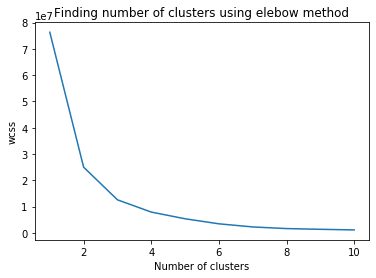

In [187]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Finding number of clusters using elebow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [188]:
kmeans= KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred = kmeans.fit_predict(X)

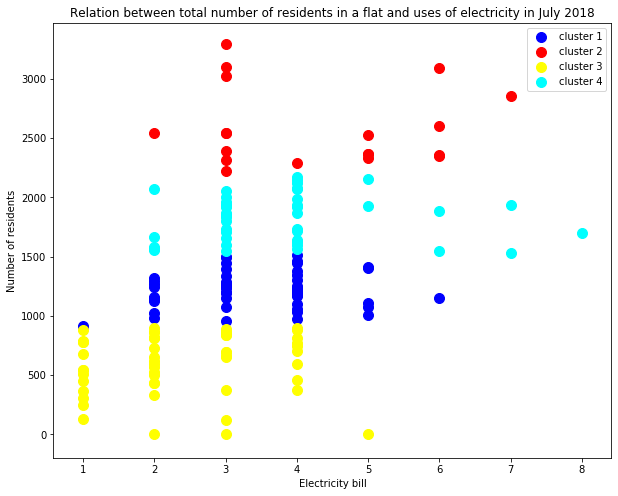

In [189]:
plt.figure(figsize=(10,8))
plt.scatter(X[pred==0,0],X[pred==0,1],c='blue',s=100,label='cluster 1')
plt.scatter(X[pred==1,0],X[pred==1,1],c='red',s=100,label='cluster 2')
plt.scatter(X[pred==2,0],X[pred==2,1],c='yellow',s=100,label='cluster 3')
plt.scatter(X[pred==3,0],X[pred==3,1],c='cyan',s=100,label='cluster 4')
plt.title('Relation between total number of residents in a flat and uses of electricity in July 2018')
plt.xlabel('Electricity bill')
plt.ylabel('Number of residents')
plt.legend()
plt.show()

### Clustering on the basis of number of adults in a flat and uses of electricity in July 2018.

In [190]:
X = dataset.iloc[:,[6,-8]].values

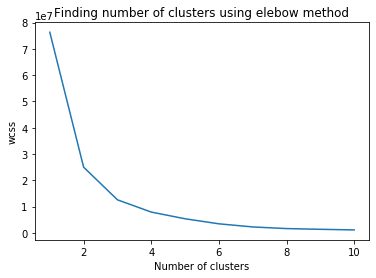

In [191]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Finding number of clusters using elebow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [192]:
kmeans= KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred = kmeans.fit_predict(X)

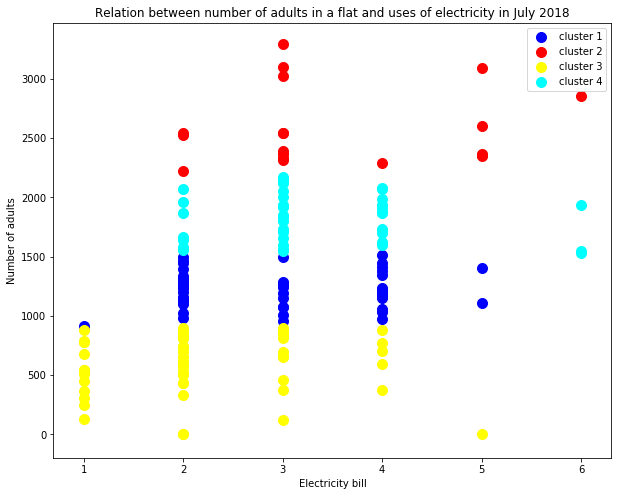

In [193]:
plt.figure(figsize=(10,8))
plt.scatter(X[pred==0,0],X[pred==0,1],c='blue',s=100,label='cluster 1')
plt.scatter(X[pred==1,0],X[pred==1,1],c='red',s=100,label='cluster 2')
plt.scatter(X[pred==2,0],X[pred==2,1],c='yellow',s=100,label='cluster 3')
plt.scatter(X[pred==3,0],X[pred==3,1],c='cyan',s=100,label='cluster 4')
plt.title('Relation between number of adults in a flat and uses of electricity in July 2018')
plt.xlabel('Electricity bill')
plt.ylabel('Number of adults')
plt.legend()
plt.show()

### Clustering on the basis of number of children in a flat and uses of electricity in July 2018.

In [194]:
X = dataset.iloc[:,[7,-8]].values

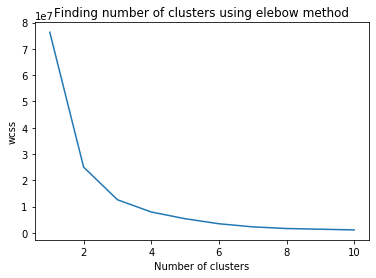

In [195]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Finding number of clusters using elebow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [196]:
kmeans= KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred = kmeans.fit_predict(X)

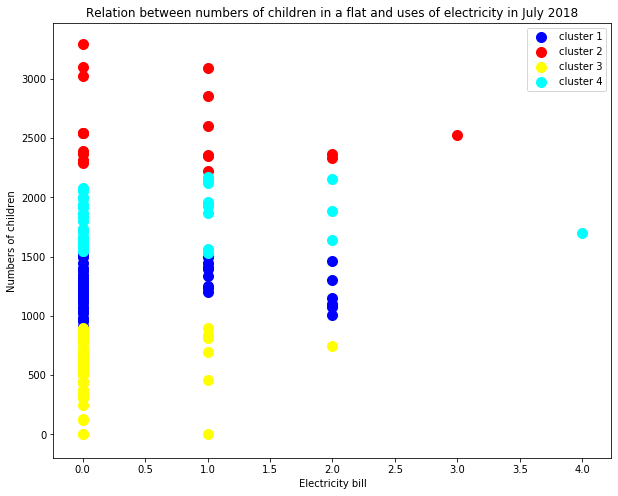

In [197]:
plt.figure(figsize=(10,8))
plt.scatter(X[pred==0,0],X[pred==0,1],c='blue',s=100,label='cluster 1')
plt.scatter(X[pred==1,0],X[pred==1,1],c='red',s=100,label='cluster 2')
plt.scatter(X[pred==2,0],X[pred==2,1],c='yellow',s=100,label='cluster 3')
plt.scatter(X[pred==3,0],X[pred==3,1],c='cyan',s=100,label='cluster 4')
plt.title('Relation between numbers of children in a flat and uses of electricity in July 2018')
plt.xlabel('Electricity bill')
plt.ylabel('Numbers of children')
plt.legend()
plt.show()





#  Development of machine learning model to predict electricity bill of a new user.

###### Since I have cleaned the data earlier, now we only have to handle categorical features and we have to normalize our dataset.

In [198]:
dataset.head()

,CONTRACT_ACCOUNT,Survey Duration,Q-1_Name of the Apartment,Q_5_Floor No,Q-6_Does your bedroom has any of the following characteristics?,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,...,201805,201806,201807,201808,201809,201810,201811,201812,201901,Grand Total
77,0,584,Anandlok,0,Southfacing,3,3,0,3.0,2,...,1009.0,1147.0,1708.0,0.0,1227.0,736.0,541.0,444.0,845.0,21498
47,1,495,Anandlok,0,Southfacing,3,2,0,4.0,1,...,377.0,686.0,1268.0,613.0,428.0,242.0,195.0,159.0,251.0,10480
87,2,610,Anandlok,2,None,3,3,0,2.0,1,...,1033.0,1312.0,2000.0,835.0,1022.0,767.0,371.0,287.0,439.0,23074
150,3,1175,Anandlok,6,None,3,2,0,1.0,1,...,458.0,922.0,1321.0,547.0,498.0,344.0,221.0,228.0,441.0,11860
89,4,613,Anandlok,5,Southfacing,3,3,0,2.0,1,...,578.0,1027.0,1253.0,539.0,517.0,273.0,230.0,275.0,437.0,12363


In [199]:
dataset.columns

Index(['CONTRACT_ACCOUNT', 'Survey Duration', 'Q-1_Name of the Apartment',
       'Q_5_Floor No',
       'Q-6_Does your bedroom has any of the following characteristics?',
       'Q-9_Apartment Type_bhk', 'Q-10_adults', 'Q-10_Children',
       'Q-15-No of Acs', 'Q-16_No of Refrigerators', 'Q-17_No of Geysers',
       'Q-18_No of Fans', 'Q-18_No of Washing Machine', 'Total Residents',
       '201701', '201702', '201703', '201704', '201705', '201706', '201707',
       '201708', '201709', '201710', '201711', '201712', '201801', '201802',
       '201803', '201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812', '201901', 'Grand Total'],
      dtype='object')

### Handling Categorical features

In [200]:
dummy_dataset=pd.get_dummies(dataset) #get_dummies method can handle all the categorical features of the dataset.
dummy_dataset.head()

,CONTRACT_ACCOUNT,Survey Duration,Q_5_Floor No,Q-9_Apartment Type_bhk,Q-10_adults,Q-10_Children,Q-15-No of Acs,Q-16_No of Refrigerators,Q-17_No of Geysers,Q-18_No of Fans,...,201809,201810,201811,201812,201901,Grand Total,Q-1_Name of the Apartment_Anandlok,Q-1_Name of the Apartment_Una,Q-6_Does your bedroom has any of the following characteristics?_None,Q-6_Does your bedroom has any of the following characteristics?_Southfacing
77,0,584,0,3,3,0,3.0,2,2.0,8,...,1227.0,736.0,541.0,444.0,845.0,21498,1,0,0,1
47,1,495,0,3,2,0,4.0,1,1.0,6,...,428.0,242.0,195.0,159.0,251.0,10480,1,0,0,1
87,2,610,2,3,3,0,2.0,1,1.0,6,...,1022.0,767.0,371.0,287.0,439.0,23074,1,0,1,0
150,3,1175,6,3,2,0,1.0,1,2.0,6,...,498.0,344.0,221.0,228.0,441.0,11860,1,0,1,0
89,4,613,5,3,3,0,2.0,1,1.0,5,...,517.0,273.0,230.0,275.0,437.0,12363,1,0,0,1


In [201]:
#Creating a temporary dummy dataset to make comparision among different features
temp=dummy_dataset.drop(columns=['CONTRACT_ACCOUNT','201701', '201702',
       '201703', '201704', '201705', '201706', '201707', '201708', '201709',
       '201710', '201711', '201712', '201801', '201802', '201803', '201804',
       '201805', '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201901'])
temp.columns

Index(['Survey Duration', 'Q_5_Floor No', 'Q-9_Apartment Type_bhk',
       'Q-10_adults', 'Q-10_Children', 'Q-15-No of Acs',
       'Q-16_No of Refrigerators', 'Q-17_No of Geysers', 'Q-18_No of Fans',
       'Q-18_No of Washing Machine', 'Total Residents', 'Grand Total',
       'Q-1_Name of the Apartment_Anandlok', 'Q-1_Name of the Apartment_Una',
       'Q-6_Does your bedroom has any of the following characteristics?_None',
       'Q-6_Does your bedroom has any of the following characteristics?_Southfacing'],
      dtype='object')

#### Visualizing the relations among different features using heatmap

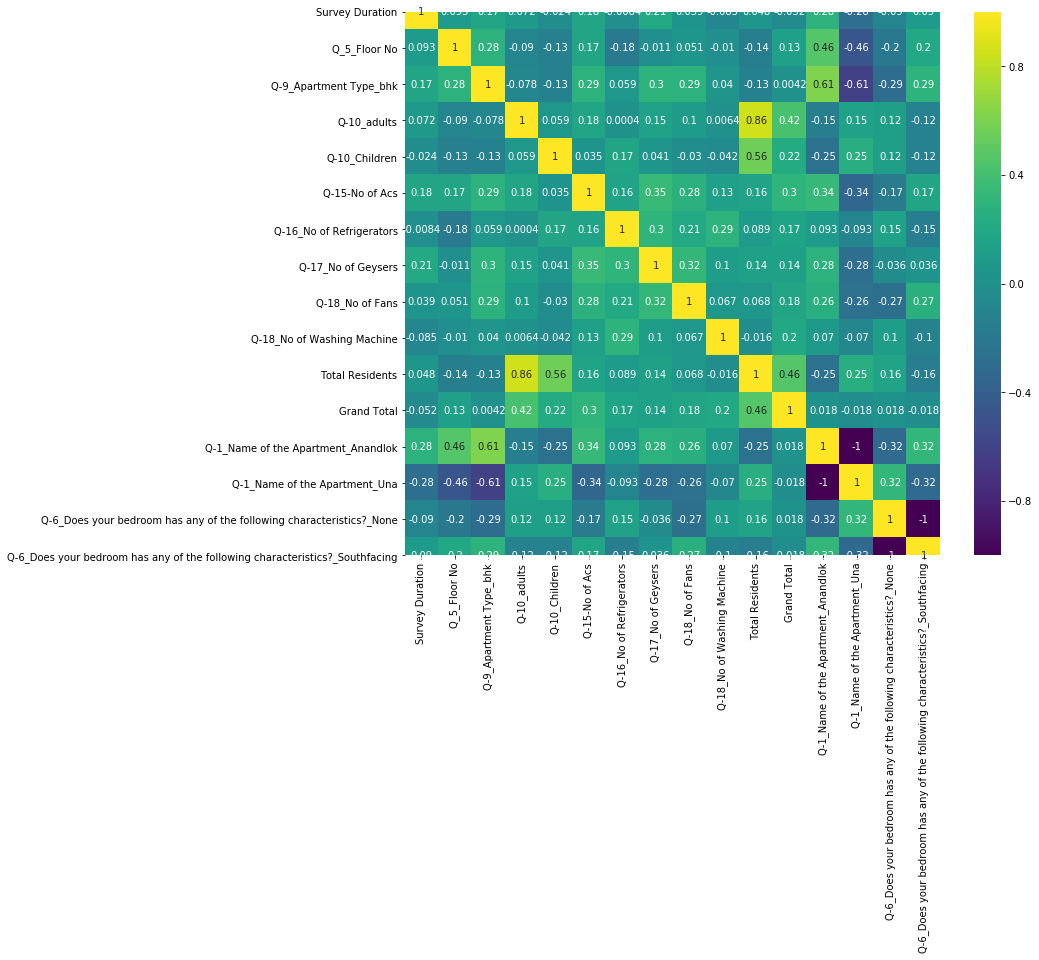

In [202]:
plt.figure(figsize=(12,10))
sns.heatmap(temp[temp.corr().index].corr(),annot=True,cmap='viridis')

From above heatmap we can see that Grand Total does not depends on name of the apartment because their relation is negative so, we should drop the column name of the apartment.

In [203]:
#dropping unnecessary features
dummy_dataset.drop(columns=['Q-1_Name of the Apartment_Anandlok', 'Q-1_Name of the Apartment_Una','CONTRACT_ACCOUNT','Total Residents'],inplace=True)

In [204]:
dummy_dataset.columns

Index(['Survey Duration', 'Q_5_Floor No', 'Q-9_Apartment Type_bhk',
       'Q-10_adults', 'Q-10_Children', 'Q-15-No of Acs',
       'Q-16_No of Refrigerators', 'Q-17_No of Geysers', 'Q-18_No of Fans',
       'Q-18_No of Washing Machine', '201701', '201702', '201703', '201704',
       '201705', '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201801', '201802', '201803', '201804', '201805', '201806',
       '201807', '201808', '201809', '201810', '201811', '201812', '201901',
       'Grand Total',
       'Q-6_Does your bedroom has any of the following characteristics?_None',
       'Q-6_Does your bedroom has any of the following characteristics?_Southfacing'],
      dtype='object')

In [205]:
len(dummy_dataset.columns)

38

#### Separating independent and dependent variables of the dataset

In [206]:
X=dummy_dataset[['Survey Duration', 'Q_5_Floor No', 'Q-9_Apartment Type_bhk',
       'Q-10_adults', 'Q-10_Children', 'Q-15-No of Acs',
       'Q-16_No of Refrigerators', 'Q-17_No of Geysers', 'Q-18_No of Fans',
       'Q-18_No of Washing Machine', '201701', '201702', '201703', '201704',
       '201705', '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201801', '201802', '201803', '201804', '201805', '201806',
       '201807', '201808', '201809', '201810', '201811', '201812', '201901','Q-6_Does your bedroom has any of the following characteristics?_None',
       'Q-6_Does your bedroom has any of the following characteristics?_Southfacing']]

y=dummy_dataset.iloc[:,-3].values

#### Dataset scaling

In [207]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Using Random Forest Regressor

In [209]:
from sklearn.ensemble import RandomForestRegressor

In [210]:
regressor = RandomForestRegressor(n_estimators=30,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [211]:
train_pred=regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [212]:
regressor.score(X,y) #prediction of X is compared with y

0.9573339255629301

In [213]:
regressor.score(X_train,y_train) #prediction of X_train is compared with y_train

0.960690577028104

In [214]:
regressor.score(X_test,y_test) #prediction of X_test is compared with y_test

0.9425553523938937